In [1]:
%cd ..

/home/tianshu/prediction


In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from forecast import Dataset, Results

In [3]:
ds = Dataset("data.npz", if_data="if.npz", offset=1000. * 1000.)
results = Results(
    ds, base_dir="results", manifest="results/manifest.json",
    baseline_key="Lr8")

  0%|          | 0/35 [00:00<?, ?it/s]

In [10]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def tsne(result):

    data = np.load(result.path)["M"]
    data = np.swapaxes(data, -2, -1)
    data = data.reshape(-1, 140).T
    scaled = StandardScaler().fit_transform(data)
    reduced = PCA(n_components=16).fit_transform(scaled)


    xy = TSNE(
        n_components=2, random_state=0, perplexity=50,
        n_jobs=6).fit_transform(reduced)

    return xy


xy = tsne(results.results["Er64"].results[-1])


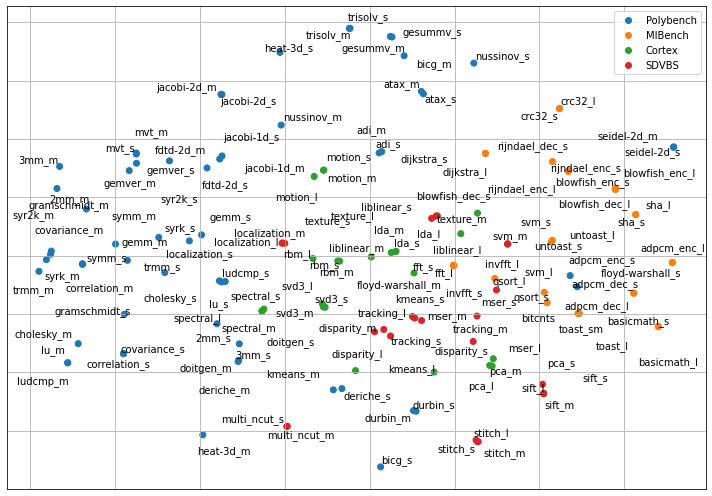

In [22]:
from matplotlib.colors import ListedColormap

_colors = {"pb": 0, "mi": 1, "cx": 2, "vn": 3}
colors = [_colors[n[:2]] for n in ds.modules]
cmap = ListedColormap(['C0', 'C1', 'C2', 'C3'])

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

scatter = ax.scatter(xy[:, 0], xy[:, 1], c=colors, cmap=cmap)

texts = [
    ax.text(x, y, label.split('/')[-1])
    for (x, y), label in zip(xy, ds.modules)]
adjust_text(texts)

ax.legend(
    handles=scatter.legend_elements()[0],
    labels=["Polybench", "MIBench", "Cortex", "SDVBS"])
ax.grid()

for axis in [ax.xaxis, ax.yaxis]:
    for tick in axis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

fig.tight_layout()
fig.savefig("figures/tsne.png", dpi=300, bbox_inches='tight')


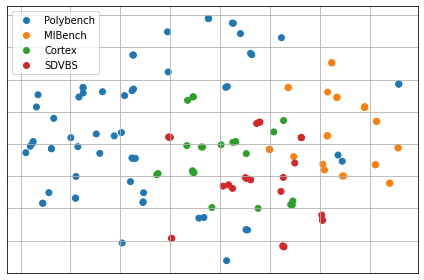

In [24]:
from matplotlib.colors import ListedColormap

_colors = {"pb": 0, "mi": 1, "cx": 2, "vn": 3}
colors = [_colors[n[:2]] for n in ds.modules]
cmap = ListedColormap(['C0', 'C1', 'C2', 'C3'])


fig, ax = plt.subplots(1, 1, figsize=(6, 4))

scatter = ax.scatter(xy[:, 0], xy[:, 1], c=colors, cmap=cmap)

ax.legend(
    handles=scatter.legend_elements()[0],
    labels=["Polybench", "MIBench", "Cortex", "SDVBS"])
ax.grid()

for axis in [ax.xaxis, ax.yaxis]:
    for tick in axis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

fig.tight_layout()
fig.savefig("figures/tsne_small.png", dpi=300, bbox_inches='tight')

In [11]:
result = results.results["Er64"].results[-1]

data = np.load(result.path)["M"]
data = np.swapaxes(data, -2, -1)
data = data.reshape(-1, 140).T
scaled = StandardScaler().fit_transform(data)
reduced = PCA(n_components=16).fit_transform(scaled)


In [28]:
from sklearn.cluster import KMeans

indices = np.argmin(KMeans(n_clusters=6).fit_transform(reduced), axis=1)
for idx in range(np.max(indices)):
    print(ds.modules[indices == idx])

['pb/2mm_s' 'pb/3mm_s' 'pb/cholesky_s' 'pb/doitgen_m' 'pb/doitgen_s'
 'pb/fdtd-2d_s' 'pb/gemm_m' 'pb/gemm_s' 'pb/jacobi-1d_m' 'pb/jacobi-1d_s'
 'pb/lu_s' 'pb/ludcmp_s' 'pb/nussinov_m' 'pb/nussinov_s' 'pb/trmm_s'
 'cx/motion_l' 'cx/motion_m' 'cx/motion_s' 'cx/rbm_l' 'cx/rbm_m'
 'cx/rbm_s' 'cx/spectral_l' 'cx/spectral_m' 'cx/spectral_s' 'cx/svd3_l'
 'cx/svd3_m' 'cx/svd3_s' 'vn/localization_l' 'vn/localization_m'
 'vn/localization_s' 'vn/multi_ncut_m' 'vn/multi_ncut_s']
['pb/floyd-warshall_m' 'pb/floyd-warshall_s' 'pb/seidel-2d_m'
 'pb/seidel-2d_s' 'mi/adpcm_dec_l' 'mi/adpcm_dec_s' 'mi/adpcm_enc_l'
 'mi/adpcm_enc_s' 'mi/basicmath_l' 'mi/basicmath_s' 'mi/bitcnts'
 'mi/blowfish_dec_l' 'mi/blowfish_dec_s' 'mi/blowfish_enc_l'
 'mi/blowfish_enc_s' 'mi/qsort_s' 'mi/rijndael_dec_s' 'mi/rijndael_enc_l'
 'mi/rijndael_enc_s' 'mi/sha_l' 'mi/sha_s' 'mi/toast_l' 'mi/toast_sm'
 'mi/untoast_l' 'mi/untoast_s']
['pb/adi_m' 'pb/adi_s' 'pb/deriche_m' 'pb/deriche_s' 'pb/durbin_m'
 'pb/durbin_s' 'mi/crc32_l' 